# Визуализация данных

### Импорт библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bikes = pd.read_pickle('Data/BikesDataImputed.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


## Графики

### Гистограмма

In [2]:
# Сгруппируем DF по месяцам и найдем среднюю месячную температуру

month_weather = bikes.groupby(bikes['Date'].dt.month)['Temperature'].mean()
# month_weather

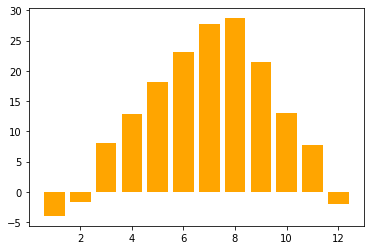

In [3]:
plt.bar(x=month_weather.index, 
        height=month_weather, 
        color='orange');

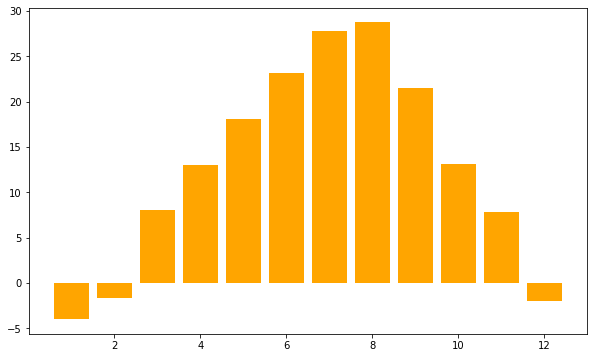

In [5]:
fig, ax = plt.subplots(figsize=(10,6))  # указываем размер графика
ax.bar(x=month_weather.index, height=month_weather, color='orange');

### График

In [6]:
# Сгруппируем данные по неделям и покажем сумму арендованных валосипедов

bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()
# bikes_sum

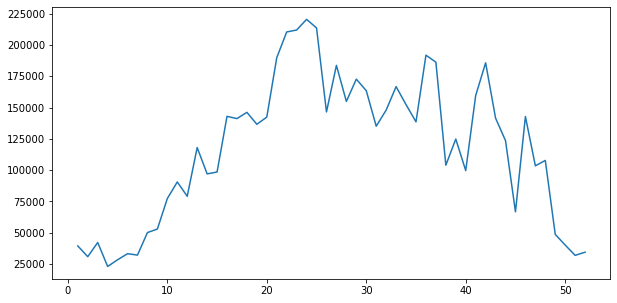

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(bikes_sum);

In [8]:
# Сгруппируем данные по сезонам и дням и покажем сумму арендованных валосипедов

seasons = bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()

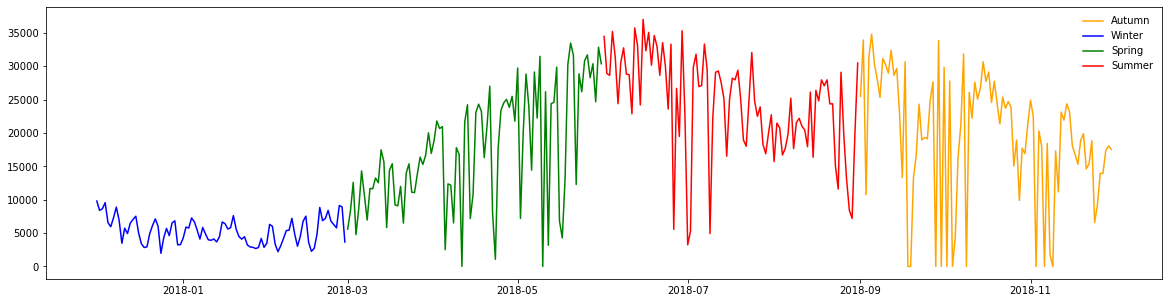

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(seasons.loc['Autumn'], color='orange')
ax.plot(seasons.loc['Winter'], color='blue')
ax.plot(seasons.loc['Spring'], color='green')
ax.plot(seasons.loc['Summer'], color='red')
ax.legend(['Autumn', 'Winter', 'Spring', 'Summer'], frameon=False)
plt.show()

In [10]:
bikes['Temperature'].describe()

count    8760.000000
mean       12.877814
std        11.939144
min       -17.800000
25%         3.500000
50%        13.700000
75%        22.500000
max        39.400000
Name: Temperature, dtype: float64

In [11]:
bikes['Temperature'].mean()

12.877813926940645

### Несколько графиков сразу

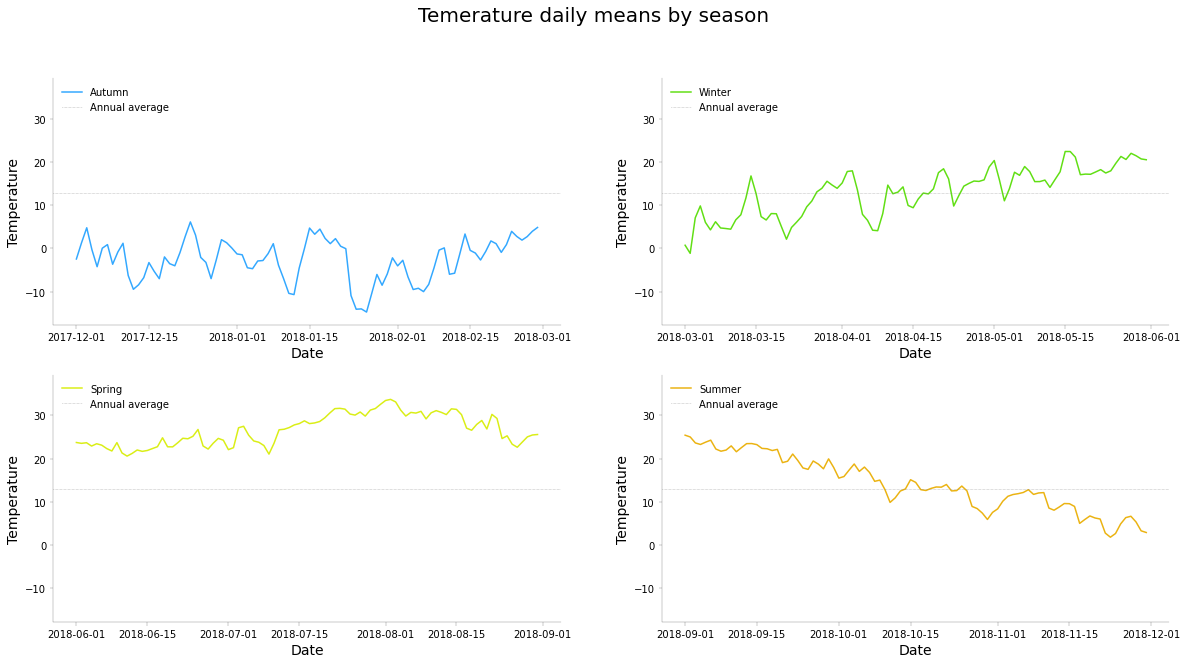

In [15]:
daily_temp = bikes.groupby(by=['Seasons', 'Date'])['Temperature'].mean()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

# Строим 4 графика на разных осях
ax[0][0].plot(daily_temp.loc['Winter'], c='#33A8FF')
ax[0][1].plot(daily_temp.loc['Spring'], c='#61DF14')
ax[1][0].plot(daily_temp.loc['Summer'], c='#DAEE16')
ax[1][1].plot(daily_temp.loc['Autumn'], c='#EBB312')

# Перебираем параметры для осей. ravel() - разворачивает массив в одномерный
for axis, season in zip(ax.ravel(), ['Autumn', 'Winter', 'Spring', 'Summer']):
    axis.set_xlabel('Date', fontsize=14)  # подпись оси OX
    axis.set_ylabel('Temperature', fontsize=14)  # подпись оси OY
    
    axis.spines['right'].set_visible(False)  # настройка видимости границы прямоугольника графика
    axis.spines['top'].set_visible(False)  # настройка видимости границы прямоугольника графика
    axis.spines['left'].set_linewidth(0.2)  # настройка видимости границы прямоугольника графика
    axis.spines['bottom'].set_linewidth(0.2)  # настройка видимости границы прямоугольника графика
    
    axis.xaxis.set_tick_params(width=0.2)
    axis.yaxis.set_tick_params(width=0.2)
    
    axis.set_ylim(bottom=bikes['Temperature'].min(), top=bikes['Temperature'].max())  # задаем границы осей
    axis.axhline(y=bikes['Temperature'].mean(), c='grey', lw=0.5, ls=':')  # добавим горизонтальную линию - среднегодовую температуру, lw - ширина линии
    
    axis.legend([season, 'Annual average'], frameon=False, loc=2)  # настройка легенды, loc - положение (номер угла)

fig.suptitle('Temerature daily means by season', fontsize=20)  # подпись общая

# Сохранение графиков в файл
fig.savefig('./uploads/temps.pdf')  # векторный
fig.savefig('./uploads/temps.png', dpi=100)  # растровый

### Построение графика рассеяния

In [16]:
# Выходные
bikes['Weekend'] = np.where(bikes['Date'].dt.day_name().isin(['Saturday', 'Sunday']) + bikes['Holiday'], 1, 0)

# Общее количество осадков, мм
bikes['Rainfall and Snowfall'] = bikes['Rainfall'] * 10 + bikes['Snowfall']

In [26]:
bikes_date = bikes.groupby(by='Date').agg({'Rental Count': 'sum',  # суммарное кол-во велосипедов в день
                                           'Temperature': 'mean',  # среднедневная температура
                                           'Rainfall and Snowfall': 'mean',  # среднее кол-во осадков
                                           'Weekend': 'max',  # был ли день рабочим или выходным
                                          })

**NB!** Для вывода цвтовой шкалы необходимо график сохранить в переменную, например в `graph`

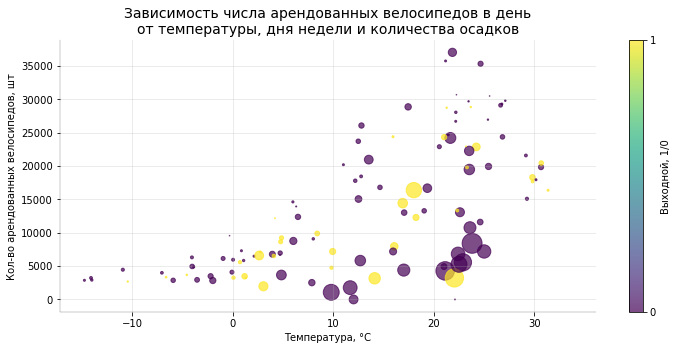

In [58]:
# Создаем блоки для графиков
fig, ax = plt.subplots(figsize=(12, 5))


graph = ax.scatter(x=bikes_date['Temperature'],  # OX - температура
                   y=bikes_date['Rental Count'],  # OY - кол-во велосипедов
                   c=bikes_date['Weekend'],  # color - выходной
                   s=bikes_date['Rainfall and Snowfall'] * 10,  # размер точки - осадки (размер точек *10)
                   alpha=0.7,  # прозрачность точки
                  )
plt.colorbar(graph, ticks=range(2), label='Выходной, 1/0')

for edge in ['right', 'top']:
    ax.spines[edge].set_visible(False)

for edge in ['left', 'bottom']:
    ax.spines[edge].set_linewidth(0.2)

ax.set_title(label='Зависимость числа арендованных велосипедов в день\nот температуры, дня недели и количества осадков', 
             fontsize=14)
ax.set_xlabel(xlabel='Температура, °C', fontsize=10)
ax.set_ylabel(ylabel='Кол-во арендованных велосипедов, шт', fontsize=10)
plt.grid(alpha=0.3)
plt.show()